**Integrantes do grupo:**


*   Mateus Viana Batista - RM 99530
*   Michael José Bernardi da Silva - RM 99409
*   Ricardo Correia Temple - RM 99721
*   Thábata Orbeteli Viotto Santos - RM 550268
*   Yago Taguchi Ruksenas - RM 97827


**CSV:** Social Rate , anexado no repositório GitHub
- O modelo foi treinado com base nesse CSV que é nossa base de Influencers, a nível de MVP criamos uma base local com os dados fictícios de alguns Influencers.

 **Modelo de Classificação**

 Um modelo de classificação é usado quando existem dados e a necessidade de categorizá-los em diferentes classes ou grupos. Ele é útil quando o conjunto de dados é rotulados e a intenção de prever a classe de novos dados com base nos padrões aprendidos a partir dos dados de treinamento.

In [ ]:
#Imporatação das Bibliotecas

# Manipulação de dados em formato de tabela
import pandas as pd

# Codificar variáveis categóricas em numéricas
from sklearn.preprocessing import LabelEncoder

# Seleção de dados de treino e teste
from sklearn.model_selection import train_test_split

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Matriz de Confusão
from sklearn.metrics import confusion_matrix

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Metricas de precisão, recall, f1-score e acurácia.
from sklearn.metrics import classification_report

# Salvar e carregar modelos treinados
import joblib

In [ ]:
#CSV - base de dados com informações dos nossos Influencers
data = pd.read_csv('/content/SocialRate.csv', delimiter=';')

**Análise Exploratória**

In [ ]:
#Exibição dos dados
data

,empresa,nicho,publicoAlvoCampanha,generoPublicoAlvoCampanha,interessesDoPublico,canalDaCampanha,alcanceDaCampanha,nomeInfluencer
0,BelezaTotal,Cosméticos,Adolescentes,Mulheres,Beleza,Instagram,Nacional,VirginiaFonseca
1,BelezaTotal,Cosméticos,Adolescentes,Mulheres,Beleza,Instagram,Nacional,VirginiaFonseca
2,BelezaTotal,Cosméticos,Adolescentes,Mulheres,Beleza,Instagram,Nacional,VirginiaFonseca
3,BelezaTotal,Cosméticos,Jovens,Mulheres,Maquiagem,Instagram,Nacional,VirginiaFonseca
4,BelezaTotal,Cosméticos,Jovens,Mulheres,Maquiagem,Instagram,Nacional,VirginiaFonseca
...,...,...,...,...,...,...,...,...
288,TechWorld,Tecnologia,Jovens,Homens,Gadgets,Instagram,Local,Dex
289,TechWorld,Tecnologia,Jovens,Homens,Inovação,Instagram,Local,Dex
290,TechWorld,Tecnologia,Adulto,Homens,Tecnologia,Instagram,Local,Dex
291,TechWorld,Tecnologia,Adulto,Homens,Gadgets,Instagram,Local,Dex


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   empresa                    293 non-null    object
 1   nicho                      293 non-null    object
 2   publicoAlvoCampanha        293 non-null    object
 3   generoPublicoAlvoCampanha  293 non-null    object
 4   interessesDoPublico        293 non-null    object
 5   canalDaCampanha            293 non-null    object
 6   alcanceDaCampanha          293 non-null    object
 7   nomeInfluencer             293 non-null    object
dtypes: object(8)
memory usage: 18.4+ KB


In [ ]:
type(data)

pandas.core.frame.DataFrame

**Pré-Processamento**

In [ ]:
# Excluir coluna 'empresa', pois é irrelevante para o treinamento do modelo
data = data.drop(columns=['empresa'])


In [ ]:
#Exibição dos dados atualizados, sem a coluna empresa
data

,nicho,publicoAlvoCampanha,generoPublicoAlvoCampanha,interessesDoPublico,canalDaCampanha,alcanceDaCampanha,nomeInfluencer
0,Cosméticos,Adolescentes,Mulheres,Beleza,Instagram,Nacional,VirginiaFonseca
1,Cosméticos,Adolescentes,Mulheres,Beleza,Instagram,Nacional,VirginiaFonseca
2,Cosméticos,Adolescentes,Mulheres,Beleza,Instagram,Nacional,VirginiaFonseca
3,Cosméticos,Jovens,Mulheres,Maquiagem,Instagram,Nacional,VirginiaFonseca
4,Cosméticos,Jovens,Mulheres,Maquiagem,Instagram,Nacional,VirginiaFonseca
...,...,...,...,...,...,...,...
288,Tecnologia,Jovens,Homens,Gadgets,Instagram,Local,Dex
289,Tecnologia,Jovens,Homens,Inovação,Instagram,Local,Dex
290,Tecnologia,Adulto,Homens,Tecnologia,Instagram,Local,Dex
291,Tecnologia,Adulto,Homens,Gadgets,Instagram,Local,Dex


In [ ]:
# Separar as features (X) e o target (y)
X = data.drop(columns=['nomeInfluencer'])
y = data['nomeInfluencer']

In [ ]:
X

,nicho,publicoAlvoCampanha,generoPublicoAlvoCampanha,interessesDoPublico,canalDaCampanha,alcanceDaCampanha
0,Cosméticos,Adolescentes,Mulheres,Beleza,Instagram,Nacional
1,Cosméticos,Adolescentes,Mulheres,Beleza,Instagram,Nacional
2,Cosméticos,Adolescentes,Mulheres,Beleza,Instagram,Nacional
3,Cosméticos,Jovens,Mulheres,Maquiagem,Instagram,Nacional
4,Cosméticos,Jovens,Mulheres,Maquiagem,Instagram,Nacional
...,...,...,...,...,...,...
288,Tecnologia,Jovens,Homens,Gadgets,Instagram,Local
289,Tecnologia,Jovens,Homens,Inovação,Instagram,Local
290,Tecnologia,Adulto,Homens,Tecnologia,Instagram,Local
291,Tecnologia,Adulto,Homens,Gadgets,Instagram,Local


In [ ]:
# Codificar features categóricas usando Label Encoding
# Conversão de variáveis categóricas em números, antes de ser usadas para treinar o modelo
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])



In [ ]:
# Tratar valores ausentes preenchendo com a moda para colunas categóricas
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].fillna(data[column].mode()[0])
    else:
        data[column] = data[column].fillna(data[column].median())


In [ ]:
#Variáveis categóricas convertidas em números
X

,nicho,publicoAlvoCampanha,generoPublicoAlvoCampanha,interessesDoPublico,canalDaCampanha,alcanceDaCampanha
0,0,0,2,0,0,1
1,0,0,2,0,0,1
2,0,0,2,0,0,1
3,0,2,2,10,0,1
4,0,2,2,10,0,1
...,...,...,...,...,...,...
288,4,2,1,7,0,0
289,4,2,1,9,0,0
290,4,1,1,11,0,0
291,4,1,1,7,0,0


**Separação dos Dados**

In [ ]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Modelo Decision Tree**

A Árvore de Decisão é um modelo de classificação que funciona dividindo o conjunto de dados em subconjuntos menores com base em características específicas.

In [ ]:
# Treinar o modelo Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#Realizar as predições
y_predict = model.predict(X_test)
y_predict

array(['Casimiro', 'VirginiaFonseca', 'Dex', 'Casimiro', 'Casimiro',
       'Casimiro', 'Ana Maria Braga', 'Casimiro', 'VirginiaFonseca',
       'Casimiro', 'Casimiro', 'Dex', 'Dex', 'Dex', 'Ana Maria Braga',
       'Casimiro', 'Dex', 'VirginiaFonseca', 'Dex', 'Dex', 'Casimiro',
       'Dex', 'Dex', 'Casimiro', 'Casimiro', 'Ana Maria Braga',
       'Ana Maria Braga', 'Casimiro', 'Casimiro', 'VirginiaFonseca',
       'Dex', 'Casimiro', 'Dex', 'Casimiro', 'Casimiro', 'Casimiro',
       'Dex', 'Casimiro', 'Casimiro', 'Casimiro', 'Casimiro', 'Casimiro',
       'Ana Maria Braga', 'Casimiro', 'Casimiro', 'Dex',
       'Ana Maria Braga', 'Ana Maria Braga', 'Dex', 'Casimiro',
       'VirginiaFonseca', 'Casimiro', 'VirginiaFonseca', 'Casimiro',
       'VirginiaFonseca', 'Casimiro', 'Casimiro', 'Casimiro',
       'VirginiaFonseca'], dtype=object)

In [ ]:
y_test

84            Casimiro
260    VirginiaFonseca
45                 Dex
176           Casimiro
143           Casimiro
125           Casimiro
227    Ana Maria Braga
118           Casimiro
9      VirginiaFonseca
90            Casimiro
147           Casimiro
275                Dex
33                 Dex
281                Dex
221    Ana Maria Braga
77            Casimiro
46                 Dex
5      VirginiaFonseca
231                Dex
244                Dex
124           Casimiro
238                Dex
279                Dex
101           Casimiro
75            Casimiro
271    Ana Maria Braga
274    Ana Maria Braga
109           Casimiro
60            Casimiro
202    VirginiaFonseca
42                 Dex
56            Casimiro
285                Dex
117           Casimiro
59            Casimiro
165           Casimiro
282                Dex
113           Casimiro
159           Casimiro
63            Casimiro
146           Casimiro
66            Casimiro
269    Ana Maria Braga
158        

**Avaliação Decision Tree**

In [ ]:
#Matriz de Confusão

matriz_confusao = confusion_matrix(y_test, y_predict)
print(matriz_confusao)

[[ 7  0  0  0]
 [ 0 30  0  0]
 [ 0  0 14  0]
 [ 0  0  0  8]]


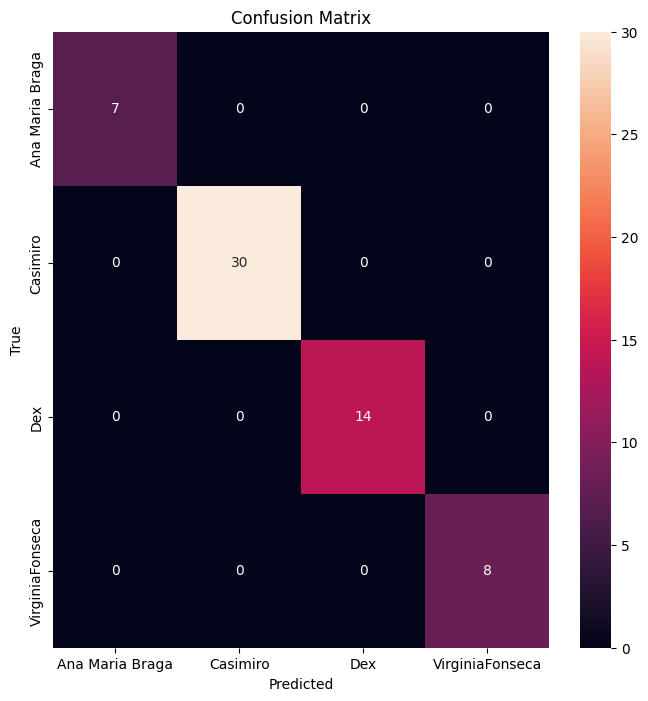

In [ ]:
# Gráfico da Matriz de Confusão
plt.figure(figsize=(8, 8))
sns.heatmap(matriz_confusao, annot=True, fmt="d", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Metricas de precisão, recall, f1-score e acurácia.

metricas_avaliacao = classification_report(y_test, y_predict)
print(metricas_avaliacao)

                 precision    recall  f1-score   support

Ana Maria Braga       1.00      1.00      1.00         7
       Casimiro       1.00      1.00      1.00        30
            Dex       1.00      1.00      1.00        14
VirginiaFonseca       1.00      1.00      1.00         8

       accuracy                           1.00        59
      macro avg       1.00      1.00      1.00        59
   weighted avg       1.00      1.00      1.00        59



In [ ]:
# Avaliar a precisão do modelo nos dados de teste
acuracia = 100 * (accuracy_score(y_test, y_predict))
print(f'A acurácia do modelo baseado no algoritmo é de{acuracia: .2f} %')

A acurácia do modelo baseado no algoritmo é de 100.00 %


Modelo exportado para uso em outros sistemas. No caso do Social Rate:

*   Java - Utilizar o modelo para prever, de acordo com as variáveis que a empresa definiu
*   C# - Utilizar a resposta do modelo e comparar o influenciador escolhido pela empresa, para dar o feedback se faz ou não sentido o uso do influenciador específico na campanha.




inputs do cliente e geração de feedback.

In [ ]:
# Salvar o modelo treinado
joblib.dump(model, 'modelo_match_influencer.pkl')

['modelo_match_influencer.pkl']

In [ ]:
# Salvar os label encoders
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

**Exemplos do Modelo sendo utilizado:**

In [ ]:
# Carregando o modelo treinado
modelo = joblib.load('modelo_match_influencer.pkl')

# Carregando os label encoders usados durante o treinamento
# Garante que as variáveis categóricas sejam convertidas para numéricas
label_encoders = joblib.load('label_encoders.pkl')

# Exemplo de campanha
novos_dados = pd.DataFrame({
    'nicho': ['Tecnologia'],
    'publicoAlvoCampanha': ['Adulto'],
    'generoPublicoAlvoCampanha': ['Mulheres'],
    'interessesDoPublico': ['Inovação'],
    'canalDaCampanha': ['TV'],
    'alcanceDaCampanha': ['Local']
})

# Aplicar label encoding aos novos dados
for column, encoder in label_encoders.items():
    novos_dados[column] = encoder.transform(novos_dados[column])

# Fazer previsão da campanha usando o modelo treinado
previsoes = modelo.predict(novos_dados)
print("Previsões para os novos dados:", previsoes)


Previsões para os novos dados: ['Dex']


In [ ]:
# Carregando o modelo treinado
modelo = joblib.load('modelo_match_influencer.pkl')

# Carregando os label encoders usados durante o treinamento
# Garante que as variáveis categóricas sejam convertidas para numéricas
label_encoders = joblib.load('label_encoders.pkl')

# Exemplo de campanha
novos_dados = pd.DataFrame({
    'nicho': ['Cosméticos'],
    'publicoAlvoCampanha': ['Adulto'],
    'generoPublicoAlvoCampanha': ['Mulheres'],
    'interessesDoPublico': ['Inovação'],
    'canalDaCampanha': ['TV'],
    'alcanceDaCampanha': ['Nacional']
})

# Aplicar label encoding aos novos dados
for column, encoder in label_encoders.items():
    novos_dados[column] = encoder.transform(novos_dados[column])

# Fazer previsão da campanha usando o modelo treinado
previsoes = modelo.predict(novos_dados)
print("Previsões para os novos dados:", previsoes)


Previsões para os novos dados: ['VirginiaFonseca']
